In [71]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
d = pd.read_csv('mpi_roof.csv',encoding='unicode_escape')
d.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2024 00:10:00,979.65,7.63,282.43,2.83,71.53,10.47,7.49,2.98,4.77,7.64,1211.93,3.37,5.04,209.0,0.0,0.0,0.0,0.0,0.0,15.38,428.8
1,01.01.2024 00:20:00,979.56,7.63,282.45,2.76,71.18,10.47,7.45,3.02,4.75,7.61,1211.82,2.63,4.50,204.5,0.0,0.0,0.0,0.0,0.0,15.42,428.1
2,01.01.2024 00:30:00,979.51,7.56,282.37,2.66,71.00,10.42,7.40,3.02,4.71,7.55,1212.11,3.48,6.96,208.1,0.0,0.0,0.0,0.0,0.0,15.47,428.3
3,01.01.2024 00:40:00,979.43,7.51,282.33,2.59,70.91,10.38,7.36,3.02,4.69,7.52,1212.25,3.73,5.13,201.8,0.0,0.0,0.0,0.0,0.0,15.52,427.8
4,01.01.2024 00:50:00,979.35,7.42,282.25,2.51,70.93,10.32,7.32,3.00,4.66,7.47,1212.56,3.06,4.21,198.6,0.0,0.0,0.0,0.0,0.0,15.53,428.0


In [55]:
features = d.drop(columns=['Date Time','wv (m/s)','max. wv (m/s)'])
target = d['wv (m/s)'].iloc[:1000]

In [56]:
arima = ARIMA(target,order=(5,1,0))

In [57]:
arima_fit = arima.fit()

In [58]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               wv (m/s)   No. Observations:                 1000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1003.383
Date:                Wed, 16 Oct 2024   AIC                           2018.765
Time:                        11:06:29   BIC                           2048.206
Sample:                             0   HQIC                          2029.955
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1714      0.025     -6.749      0.000      -0.221      -0.122
ar.L2         -0.1577      0.029     -5.347      0.000      -0.216      -0.100
ar.L3         -0.0989      0.029     -3.452      0.001      -0.155      -0.043
ar.L4         -0.1065      0.029     -3.682      0.000      -0.163      -0.050
ar.L5         -0.0277      0.028     -0.991      0.322      -0.082       0.027
sigma2         0.4364      0.015     29.681      0.000       0.408       0.465
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               108.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:ylabel='Density'>

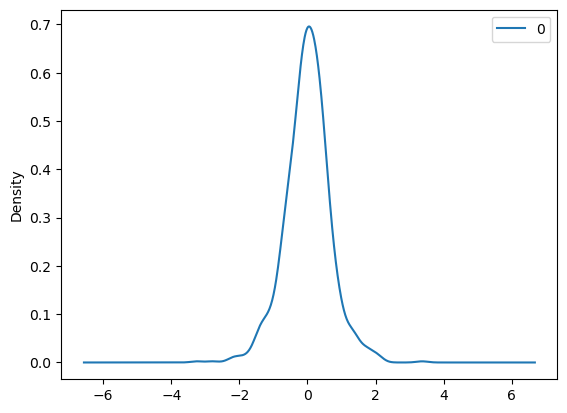

In [59]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot(kind='kde')

In [60]:
ind = int(np.floor(0.66*len(target)))
train_data = target.iloc[:ind].values
test_data = target.iloc[ind:].values

In [67]:
predictions = []
train_data = list(train_data)
for i in range(len(test_data)):
    arima = ARIMA(train_data,order=(5,2,0))
    arima_fit = arima.fit()
    pred = arima_fit.forecast()
    predictions.append(pred)
    train_data.append(test_data[i])

In [72]:
mean_squared_error(predictions,test_data)

0.311036684067252

In [69]:
x = [1,2,3]
x.append(4)

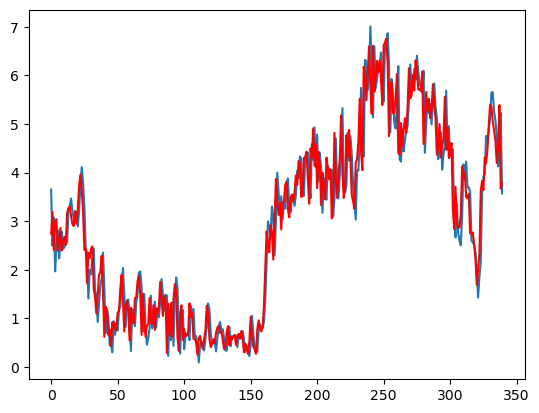

In [74]:
plt.plot(predictions)
plt.plot(test_data,'r')